In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
df = pd.read_html("data/S&P 500 Historical Prices by Month.htm", flavor="lxml")[0].sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').reset_index()  # reset index to increasing
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Return'] =  df['Price Value'].pct_change() / 100

In [4]:
df.plot?

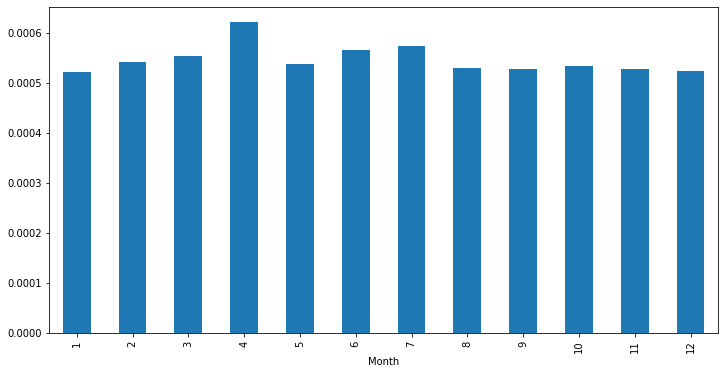

In [5]:
df.groupby('Month')['Return'].mean().plot.bar()

In [6]:
df[df['Year'] > 1980].groupby('Month')['Return'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,39.0,0.000968,0.001589,-0.003722,-2.412121e-04,0.001383,0.002282,0.003206
2,39.0,0.000982,0.001634,-0.004057,2.283565e-04,0.001182,0.002129,0.003660
3,39.0,0.001039,0.001797,-0.004251,3.682740e-04,0.001051,0.001959,0.005216
4,39.0,0.001030,0.001683,-0.003811,1.839016e-04,0.001227,0.001837,0.004559
5,39.0,0.001001,0.001548,-0.003569,7.450622e-05,0.001176,0.002070,0.004098
6,39.0,0.000970,0.001611,-0.003095,5.773972e-05,0.001133,0.001993,0.005169
7,39.0,0.000995,0.001702,-0.002557,2.861981e-04,0.000984,0.002169,0.005265
8,38.0,0.000987,0.001646,-0.002257,4.230184e-04,0.001097,0.001824,0.004804
9,38.0,0.000980,0.001597,-0.002884,2.127220e-04,0.001029,0.001797,0.003884


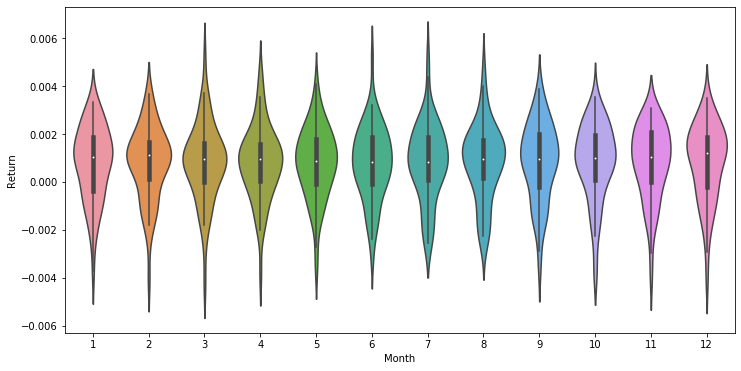

In [7]:
sns.violinplot(x="Month", y="Return", data=df[df['Year'] > 1960])

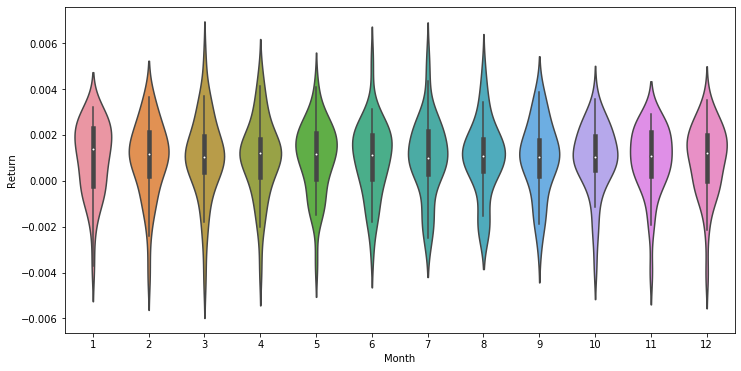

In [8]:
sns.violinplot(x="Month", y="Return", data=df[df['Year'] > 1980])

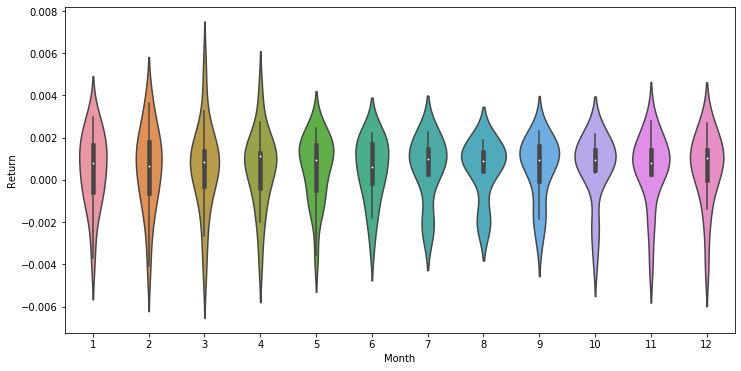

In [9]:
sns.violinplot(x="Month", y="Return", data=df[df['Year'] > 2000])